# MolMIM Property Guided Molecular Optimization Using CMA-ES

Here we demonstrate how to load a [MolMIM](https://arxiv.org/abs/2208.09016) checkpoint from the BioNeMo Framework and use it to optimize some molecules of interest with a custom user-defined scoring function. We use [CMA-ES](https://en.wikipedia.org/wiki/CMA-ES) to traverse the latent space of our MolMIM model and select novel, related molecules expected to improve performance as measured by the scoring function. To sample these molecules, we must complete the following steps:

1. Load the desired MolMIM checkpoint.
2. Encode the starting molecules into MolMIM's latent space.
3. Run CMA-ES, which will iteratively perform the following:
    1. Decode latent representations into SMILES strings.
    2. Apply the user defined scoring function to these SMILES strings to generate SMILES/scores pairings.
    3. Ask the CMA-ES algorithm for a new set of latent space representations from which to sample.

Note: this notebook is derived from [a previous tutorial made for the BioNeMo Service version of MolMIM](https://github.com/NVIDIA/BioNeMo/blob/main/examples/service/notebooks/cma_custom_oracles.ipynb).

### Setup your environment for this test
For this tutorial, we assume you are running within the latest BioNeMo Framework Docker container.

From within the Docker container, download the example checkpoint, or use your own: 

```
python download_models.py --download_dir models molmim_70m_24_3
```

### Load your checkpoint into the molmim inference wrapper

In [1]:
from bionemo.utils.hydra import load_model_config
import os
from bionemo.model.molecule.molmim.infer import MolMIMInference
bionemo_home=f"/workspace/bionemo"
os.environ['BIONEMO_HOME'] = bionemo_home
checkpoint_path = f"{bionemo_home}/models/molecule/molmim/molmim_70m_24_3.nemo"
cfg = load_model_config(config_name="molmim_infer.yaml", config_path=f"{bionemo_home}/examples/tests/conf/") # reasonable starting config for molmim inference
# This is the field of the config that we need to set to our desired checkpoint path.
cfg.model.downstream_task.restore_from_path = checkpoint_path
model = MolMIMInference(cfg, interactive=True)

[NeMo I 2024-03-22 15:50:47 megatron_hiddens:110] Registered hidden transform sampled_var_cond_gaussian at bionemo.model.core.hiddens_support.SampledVarGaussianHiddenTransform
[NeMo I 2024-03-22 15:50:47 megatron_hiddens:110] Registered hidden transform interp_var_cond_gaussian at bionemo.model.core.hiddens_support.InterpVarGaussianHiddenTransform
[NeMo I 2024-03-22 15:50:47 utils:326] Restoring model from /workspace/bionemo/models/molecule/molmim/molmim_70m_24_3.nemo
[NeMo I 2024-03-22 15:50:47 utils:330] Loading model class: bionemo.model.molecule.molmim.molmim_model.MolMIMModel
Interactive mode selected, using strategy='auto'


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[NeMo I 2024-03-22 15:50:48 exp_manager:394] Experiments will be logged at /workspace/bionemo/test_results/nemo_experiments/molmim_infer/MolMIM_Inference/2024-03-22_15-50-48
[NeMo I 2024-03-22 15:50:48 utils:299] 
    
    ************** Trainer configuration ***********
[NeMo I 2024-03-22 15:50:48 utils:300] 
    name: MolMIM_Inference
    desc: Minimum configuration for initializing a MolMIM model for inference.
    trainer:
      precision: 16-mixed
      devices: 1
      num_nodes: 1
      accelerator: gpu
      logger: false
      accumulate_grad_batches: 1
    exp_manager:
      explicit_log_dir: null
      exp_dir: ${oc.env:BIONEMO_HOME}/test_results/nemo_experiments/molmim_infer
      name: ${name}
      create_checkpoint_callback: false
      create_wandb_logger: false
      create_tensorboard_logger: false
      wandb_logger_kwargs:
        offline: true
    model:
      encoder:
        num_layers: 6
        hidden_size: 512
        ffn_hidden_size: 2048
        num_attentio

[NeMo W 2024-03-22 15:50:48 megatron_base_model:821] The model: MolMIMModel() does not have field.name: context_parallel_size in its cfg. Add this key to cfg or config_mapping to make to make it configurable.
[NeMo W 2024-03-22 15:50:48 megatron_base_model:821] The model: MolMIMModel() does not have field.name: virtual_pipeline_model_parallel_size in its cfg. Add this key to cfg or config_mapping to make to make it configurable.
[NeMo W 2024-03-22 15:50:48 megatron_base_model:821] The model: MolMIMModel() does not have field.name: sequence_parallel in its cfg. Add this key to cfg or config_mapping to make to make it configurable.
[NeMo W 2024-03-22 15:50:48 megatron_base_model:821] The model: MolMIMModel() does not have field.name: expert_model_parallel_size in its cfg. Add this key to cfg or config_mapping to make to make it configurable.
[NeMo W 2024-03-22 15:50:48 megatron_base_model:821] The model: MolMIMModel() does not have field.name: use_cpu_initialization in its cfg. Add this 

[NeMo I 2024-03-22 15:50:48 megatron_init:234] Rank 0 has data parallel group: [0]
[NeMo I 2024-03-22 15:50:48 megatron_init:237] All data parallel group ranks: [[0]]
[NeMo I 2024-03-22 15:50:48 megatron_init:238] Ranks 0 has data parallel rank: 0
[NeMo I 2024-03-22 15:50:48 megatron_init:246] Rank 0 has model parallel group: [0]
[NeMo I 2024-03-22 15:50:48 megatron_init:247] All model parallel group ranks: [[0]]
[NeMo I 2024-03-22 15:50:48 megatron_init:257] Rank 0 has tensor model parallel group: [0]
[NeMo I 2024-03-22 15:50:48 megatron_init:261] All tensor model parallel group ranks: [[0]]
[NeMo I 2024-03-22 15:50:48 megatron_init:262] Rank 0 has tensor model parallel rank: 0
[NeMo I 2024-03-22 15:50:48 megatron_init:276] Rank 0 has pipeline model parallel group: [0]
[NeMo I 2024-03-22 15:50:48 megatron_init:288] Rank 0 has embedding group: [0]
[NeMo I 2024-03-22 15:50:48 megatron_init:294] All pipeline model parallel group ranks: [[0]]
[NeMo I 2024-03-22 15:50:48 megatron_init:295]

[NeMo W 2024-03-22 15:50:48 megatron_base_model:821] The model: MolMIMModel() does not have field.name: context_parallel_size in its cfg. Add this key to cfg or config_mapping to make to make it configurable.
[NeMo W 2024-03-22 15:50:48 megatron_base_model:821] The model: MolMIMModel() does not have field.name: virtual_pipeline_model_parallel_size in its cfg. Add this key to cfg or config_mapping to make to make it configurable.
[NeMo W 2024-03-22 15:50:48 megatron_base_model:821] The model: MolMIMModel() does not have field.name: sequence_parallel in its cfg. Add this key to cfg or config_mapping to make to make it configurable.
[NeMo W 2024-03-22 15:50:48 megatron_base_model:821] The model: MolMIMModel() does not have field.name: expert_model_parallel_size in its cfg. Add this key to cfg or config_mapping to make to make it configurable.
[NeMo W 2024-03-22 15:50:48 megatron_base_model:821] The model: MolMIMModel() does not have field.name: use_cpu_initialization in its cfg. Add this 

[NeMo I 2024-03-22 15:50:48 tokenizer_utils:199] Using regex tokenization
[NeMo I 2024-03-22 15:50:48 regex_tokenizer:240] Loading vocabulary from file = /tmp/tmpkrp5q227/dd344353154640acbbaea1d4536fa7d0_molmim.vocab
[NeMo I 2024-03-22 15:50:48 regex_tokenizer:254] Loading regex from file = /tmp/tmpkrp5q227/048c1f797f464dd5b6a90f60f9405827_molmim.model
[NeMo I 2024-03-22 15:50:48 megatron_base_model:315] Padded vocab_size: 640, original vocab_size: 523, dummy tokens: 117.
[NeMo I 2024-03-22 15:50:48 megatron_hiddens:121] NOTE: Adding hiddens transforms and losses
[NeMo I 2024-03-22 15:50:48 megatron_hiddens:149] Added transform q_z_given_x with cfg={'cls_name': 'sampled_var_cond_gaussian', 'hidden_size': 512, 'min_logvar': -6.0, 'max_logvar': 0.0, 'map_var_to_hiddens': False}
[NeMo I 2024-03-22 15:50:48 megatron_hiddens:177] Added loss mim with cfg={'cls_name': 'a_mim', 'loss_weight': 1.0}
[NeMo I 2024-03-22 15:50:49 nlp_overrides:752] Model MolMIMModel was successfully restored from /

[NeMo W 2024-03-22 15:50:49 nemo_logging:349] /usr/local/lib/python3.10/dist-packages/nemo/collections/nlp/modules/common/megatron/fused_bias_dropout_add.py:70: UserWarning: nvfuser integration in TorchScript is deprecated. (Triggered internally at /opt/pytorch/pytorch/torch/csrc/jit/codegen/cuda/interface.cpp:235.)
      return bias_dropout_add_fused_inference_(*args)
    


[NeMo I 2024-03-22 15:50:50 megatron_lm_encoder_decoder_model:1195] Decoding using the greedy-search method...


### Setup user-defined molecule scoring function
This is the section where you as a user can pull in your own scoring functions that you want to optimize. For this example, we will be optimizing a combination of Tanimoto similarity to the input molecule and Quantitative Estimate of Druglikeness (QED) following the example from the initial [MolMIM publication](https://arxiv.org/abs/2208.09016):

$$
  score = min(QED / 0.9, 1) + min(Tanimoto / 0.4, 1)
$$

In this case, we will allow the model to optimize up to a maximum QED of 0.9 and Tanimoto similarity of 0.4. Once these maxima are achieved, we perform no further optimization. 

In [2]:
from typing import List, Optional

import numpy as np

from guided_molecule_gen.oracles import qed, tanimoto_similarity

def score_mixing_function(qeds, similarities):
    # We want to maximize QED and tanimoto similarity up to 0.9 and 0.4, respectively.
    return np.clip(qeds / 0.9, a_min=0.0, a_max=1.0) + np.clip(similarities / 0.4, a_min=0.0, a_max=1.0)

def try_canon(smiles:str) -> Optional[str]:
    try:
        return Chem.MolToSmiles(Chem.MolFromSmiles(smiles), canonical=True)
    except:
        return None

def canonicalize(smiles: List[str]) -> List[str]:
    return [try_canon(s) for s in smiles]


def scoring_function(smiles: List[str], reference:str, **kwargs) -> np.ndarray:
    """Takes a list of SMILES strings and returns an array of scores.

    Args:
        smiles (List[str]): Smiles strings to generate a score for (one each)
        reference (str): Reference molecule (SMILES string) is also used for this scoring function.

    Returns:
        np.ndarray: Array of scores, one for each input SMILES string.
    """
    #csmiles = canonicalize(smiles)
    scores: np.ndarray = score_mixing_function(qed(smiles), tanimoto_similarity(smiles, reference))
    return -1 * scores

### Define starting molecules
In this section, we will define the starting molecules for the optimization process. As a set of examples, we will use imatinib, erlotinib, and gifitinib. We ensure that the SMILES strings representing these molecules are canonicalized using RDKit. MolMIM was trained on a corpus of RDKit-cononicalized SMILES strings, so any inputs and outputs should be RDKit-canonicalized as well to achieve peak performance.

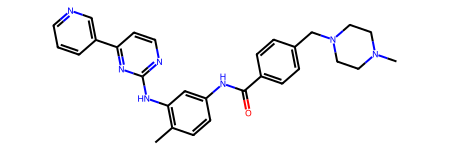

In [3]:
from rdkit import Chem
from rdkit.Chem.QED import qed as rdkit_qed
starting_smiles = [
    "CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5", # imatinib
    "COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C)OCCOC", # erlotinib
    "C1COCCN1CCCOc2c(OC)cc3ncnc(c3c2)Nc4cc(Cl)c(F)cc4", # gifitinib
]

# Canonicalize all SMILES strings and print the structure of imatinib
molecules = [Chem.MolFromSmiles(s) for s in starting_smiles]
starting_qed = [rdkit_qed(m) for m in molecules]
canonicalized_smiles = [Chem.MolToSmiles(m, canonical=True) for m in molecules]
molecules[0]

### Setup the optimizer and wrap the inference API for CMA-ES
The CMA-ES library expects certain formats for input/output of the inference model to function properly. We provide a wrapper for this and show how to setup optimization below.

In [4]:
from bionemo.model.core.controlled_generation import ControlledGenerationPerceiverEncoderInferenceWrapper

controlled_gen_kwargs = {
    "sampling_method": "beam-search",
    "sampling_kwarg_overrides": {"beam_size": 3, "keep_only_best_tokens": True, "return_scores": False},
}

model_wrapped = ControlledGenerationPerceiverEncoderInferenceWrapper(
    model, enforce_perceiver=True, hidden_steps=1, **controlled_gen_kwargs
)  # just flatten the position for this.

### Tune CMA-ES
Different models will have different optimal settings for CMA-ES. Here, we perform a grid search over possible values of `sigma`, then perform more steps of optimization with the best. We will use the [Optuna library](https://optuna.org/) to perform this optimization over the `sigma` hyperparameter. This process is referred to as hyperparatemer optimization or HPO.

In [5]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [6]:
from guided_molecule_gen.optimizer import MoleculeGenerationOptimizer
import optuna

def objective(trial, n_steps:int=10):
    sigma = trial.suggest_float('sigma', 0, 2)
    optimizer = MoleculeGenerationOptimizer(
        model_wrapped,
        scoring_function,
        canonicalized_smiles,
        popsize=10,  # larger values will be slower but more thorough
        optimizer_args={"sigma": sigma},
    )
    optimizer.optimize(n_steps)
    final_smiles = optimizer.generated_smis
    final_score = np.mean([np.min(scoring_function(smis_population, reference_smis)) for smis_population,reference_smis in zip(final_smiles, canonicalized_smiles)])
    return final_score

study = optuna.create_study()
study.optimize(objective, n_trials=50)
print(study.best_params)

[I 2024-03-22 15:50:56,086] A new study created in memory with name: no-name-7e3f6666-25c5-4af0-a8a3-987ea1477566


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=184028, Fri Mar 22 15:50:56 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=263743, Fri Mar 22 15:50:56 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=177481, Fri Mar 22 15:50:56 2024)
[NeMo I 2024-03-22 15:50:56 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:50:58 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:00 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:02 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:04 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:06 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:51:15,771] Trial 0 finished with value: -1.6638290331236025 and parameters: {'sigma': 0.13176216745842084}. Best is trial 0 with value: -1.6638290331236025.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=268975, Fri Mar 22 15:51:15 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=213670, Fri Mar 22 15:51:15 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=251428, Fri Mar 22 15:51:15 2024)
[NeMo I 2024-03-22 15:51:15 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:17 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:19 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:21 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:23 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:25 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:51:34,970] Trial 1 finished with value: -1.6708456377350098 and parameters: {'sigma': 0.1788389080326782}. Best is trial 1 with value: -1.6708456377350098.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=302939, Fri Mar 22 15:51:34 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=131562, Fri Mar 22 15:51:35 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=153099, Fri Mar 22 15:51:35 2024)
[NeMo I 2024-03-22 15:51:35 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:36 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:38 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:40 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:42 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:44 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:51:54,100] Trial 2 finished with value: -0.9968631161177796 and parameters: {'sigma': 1.7341544339881114}. Best is trial 1 with value: -1.6708456377350098.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=159782, Fri Mar 22 15:51:54 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=215392, Fri Mar 22 15:51:54 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=213395, Fri Mar 22 15:51:54 2024)
[NeMo I 2024-03-22 15:51:54 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:56 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:57 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:51:59 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:01 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:03 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:52:13,295] Trial 3 finished with value: -1.4509472129725 and parameters: {'sigma': 1.5698095134424892}. Best is trial 1 with value: -1.6708456377350098.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=228388, Fri Mar 22 15:52:13 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=223598, Fri Mar 22 15:52:13 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=194880, Fri Mar 22 15:52:13 2024)
[NeMo I 2024-03-22 15:52:13 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:15 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:17 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:19 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:20 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:22 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:52:32,490] Trial 4 finished with value: -1.6573820968029167 and parameters: {'sigma': 1.3099029637878306}. Best is trial 1 with value: -1.6708456377350098.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=206956, Fri Mar 22 15:52:32 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=260273, Fri Mar 22 15:52:32 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=203825, Fri Mar 22 15:52:32 2024)
[NeMo I 2024-03-22 15:52:32 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:34 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:36 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:38 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:40 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:42 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:52:51,741] Trial 5 finished with value: -1.7754158666744182 and parameters: {'sigma': 0.35769460248621776}. Best is trial 5 with value: -1.7754158666744182.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=231723, Fri Mar 22 15:52:51 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=206547, Fri Mar 22 15:52:51 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=255305, Fri Mar 22 15:52:51 2024)
[NeMo I 2024-03-22 15:52:51 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:53 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:55 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:57 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:52:59 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:01 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:53:10,863] Trial 6 finished with value: -1.337132995342649 and parameters: {'sigma': 1.957306121905405}. Best is trial 5 with value: -1.7754158666744182.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=257384, Fri Mar 22 15:53:10 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=283855, Fri Mar 22 15:53:10 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=275855, Fri Mar 22 15:53:10 2024)
[NeMo I 2024-03-22 15:53:10 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:12 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:14 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:16 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:18 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:20 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:53:30,091] Trial 7 finished with value: -1.8120665871264265 and parameters: {'sigma': 1.0946556916301828}. Best is trial 7 with value: -1.8120665871264265.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=144259, Fri Mar 22 15:53:30 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=206699, Fri Mar 22 15:53:30 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=180830, Fri Mar 22 15:53:30 2024)
[NeMo I 2024-03-22 15:53:30 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:32 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:33 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:35 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:37 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:39 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:53:49,369] Trial 8 finished with value: -1.7738668287052797 and parameters: {'sigma': 1.316710963004739}. Best is trial 7 with value: -1.8120665871264265.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=212574, Fri Mar 22 15:53:49 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=240296, Fri Mar 22 15:53:49 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=166781, Fri Mar 22 15:53:49 2024)
[NeMo I 2024-03-22 15:53:49 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:51 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:53 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:55 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:57 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:53:59 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:54:08,784] Trial 9 finished with value: -1.8039128660064192 and parameters: {'sigma': 0.28291842967817105}. Best is trial 7 with value: -1.8120665871264265.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=275187, Fri Mar 22 15:54:08 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=232382, Fri Mar 22 15:54:08 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=229828, Fri Mar 22 15:54:08 2024)
[NeMo I 2024-03-22 15:54:08 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:54:10 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:54:12 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:54:14 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:54:16 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:54:18 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:54:28,177] Trial 10 finished with value: -1.926194020904745 and parameters: {'sigma': 0.7517222599082064}. Best is trial 10 with value: -1.926194020904745.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=163545, Fri Mar 22 15:54:28 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=168658, Fri Mar 22 15:54:28 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=169644, Fri Mar 22 15:54:28 2024)
[NeMo I 2024-03-22 15:54:28 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:54:30 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:54:32 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:54:33 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:54:35 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:54:37 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:54:47,311] Trial 11 finished with value: -1.9423986990758306 and parameters: {'sigma': 0.7532818500298163}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=201897, Fri Mar 22 15:54:47 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=180255, Fri Mar 22 15:54:47 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=224534, Fri Mar 22 15:54:47 2024)
[NeMo I 2024-03-22 15:54:47 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:54:49 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:54:51 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:54:53 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:54:54 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:54:56 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:55:06,489] Trial 12 finished with value: -1.9047630129013011 and parameters: {'sigma': 0.64025838012875}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=223828, Fri Mar 22 15:55:06 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=255712, Fri Mar 22 15:55:06 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=217592, Fri Mar 22 15:55:06 2024)
[NeMo I 2024-03-22 15:55:06 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:55:08 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:55:10 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:55:12 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:55:14 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:55:16 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:55:25,663] Trial 13 finished with value: -1.8963051721567767 and parameters: {'sigma': 0.6853723356903602}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=280846, Fri Mar 22 15:55:25 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=292116, Fri Mar 22 15:55:25 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=199572, Fri Mar 22 15:55:25 2024)
[NeMo I 2024-03-22 15:55:25 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:55:27 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:55:29 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:55:31 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:55:33 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:55:35 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:55:44,797] Trial 14 finished with value: -1.9186069296744457 and parameters: {'sigma': 0.7544391124205039}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=252994, Fri Mar 22 15:55:44 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=294518, Fri Mar 22 15:55:44 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=255612, Fri Mar 22 15:55:44 2024)
[NeMo I 2024-03-22 15:55:44 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:55:46 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:55:48 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:55:50 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:55:52 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:55:54 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:56:03,999] Trial 15 finished with value: -1.7499775285813346 and parameters: {'sigma': 0.9405113283810009}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=223726, Fri Mar 22 15:56:04 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=147863, Fri Mar 22 15:56:04 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=145696, Fri Mar 22 15:56:04 2024)
[NeMo I 2024-03-22 15:56:04 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:56:06 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:56:07 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:56:09 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:56:11 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:56:13 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:56:23,359] Trial 16 finished with value: -1.8721884918273846 and parameters: {'sigma': 0.5555891150803465}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=235632, Fri Mar 22 15:56:23 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=260134, Fri Mar 22 15:56:23 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=184070, Fri Mar 22 15:56:23 2024)
[NeMo I 2024-03-22 15:56:23 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:56:25 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:56:27 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:56:29 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:56:31 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:56:32 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:56:42,600] Trial 17 finished with value: -1.9057377513153446 and parameters: {'sigma': 0.9964055132222357}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=246718, Fri Mar 22 15:56:42 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=231716, Fri Mar 22 15:56:42 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=232281, Fri Mar 22 15:56:42 2024)
[NeMo I 2024-03-22 15:56:42 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:56:44 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:56:46 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:56:48 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:56:50 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:56:52 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:57:01,846] Trial 18 finished with value: -1.9092861368330676 and parameters: {'sigma': 0.4551612841742564}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=251906, Fri Mar 22 15:57:01 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=231697, Fri Mar 22 15:57:01 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=264823, Fri Mar 22 15:57:01 2024)
[NeMo I 2024-03-22 15:57:01 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:57:03 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:57:05 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:57:07 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:57:09 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:57:11 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:57:21,143] Trial 19 finished with value: -1.8626183161109882 and parameters: {'sigma': 0.844995506528921}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=239436, Fri Mar 22 15:57:21 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=173264, Fri Mar 22 15:57:21 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=215070, Fri Mar 22 15:57:21 2024)
[NeMo I 2024-03-22 15:57:21 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:57:23 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:57:25 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:57:26 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:57:28 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:57:30 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:57:40,386] Trial 20 finished with value: -1.9324065421120828 and parameters: {'sigma': 1.2310733125891054}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=194599, Fri Mar 22 15:57:40 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=186390, Fri Mar 22 15:57:40 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=174718, Fri Mar 22 15:57:40 2024)
[NeMo I 2024-03-22 15:57:40 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:57:42 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:57:44 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:57:46 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:57:48 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:57:50 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:57:59,677] Trial 21 finished with value: -1.8428655891494188 and parameters: {'sigma': 1.1818364561163708}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=252500, Fri Mar 22 15:57:59 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=290590, Fri Mar 22 15:57:59 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=286948, Fri Mar 22 15:57:59 2024)
[NeMo I 2024-03-22 15:57:59 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:01 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:03 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:05 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:07 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:09 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:58:18,963] Trial 22 finished with value: -1.6811500963907349 and parameters: {'sigma': 1.5308198469573666}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=226541, Fri Mar 22 15:58:18 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=322521, Fri Mar 22 15:58:18 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=186856, Fri Mar 22 15:58:19 2024)
[NeMo I 2024-03-22 15:58:19 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:20 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:22 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:24 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:26 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:28 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:58:38,217] Trial 23 finished with value: -1.8941596701526364 and parameters: {'sigma': 0.8233070618875522}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=241831, Fri Mar 22 15:58:38 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=222120, Fri Mar 22 15:58:38 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=205221, Fri Mar 22 15:58:38 2024)
[NeMo I 2024-03-22 15:58:38 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:40 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:42 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:44 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:45 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:47 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:58:57,463] Trial 24 finished with value: -1.8815083468261118 and parameters: {'sigma': 1.268977937364232}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=202703, Fri Mar 22 15:58:57 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=195518, Fri Mar 22 15:58:57 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=195087, Fri Mar 22 15:58:57 2024)
[NeMo I 2024-03-22 15:58:57 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:58:59 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:01 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:03 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:05 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:07 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:59:16,723] Trial 25 finished with value: -1.6182401109767266 and parameters: {'sigma': 0.9429778755439713}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=199634, Fri Mar 22 15:59:16 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=271269, Fri Mar 22 15:59:16 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=286306, Fri Mar 22 15:59:16 2024)
[NeMo I 2024-03-22 15:59:16 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:18 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:20 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:22 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:24 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:26 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:59:36,055] Trial 26 finished with value: -1.5085159203262488 and parameters: {'sigma': 0.0151811479211722}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=194872, Fri Mar 22 15:59:36 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=135098, Fri Mar 22 15:59:36 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=188585, Fri Mar 22 15:59:36 2024)
[NeMo I 2024-03-22 15:59:36 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:38 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:39 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:41 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:43 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:45 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 15:59:55,286] Trial 27 finished with value: -1.4522338288887677 and parameters: {'sigma': 1.4496218566771268}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=213882, Fri Mar 22 15:59:55 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=192385, Fri Mar 22 15:59:55 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=228897, Fri Mar 22 15:59:55 2024)
[NeMo I 2024-03-22 15:59:55 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:57 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 15:59:59 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:01 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:03 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:04 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:00:14,637] Trial 28 finished with value: -1.8963760110895127 and parameters: {'sigma': 0.4976237739915497}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=214946, Fri Mar 22 16:00:14 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=241094, Fri Mar 22 16:00:14 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=258835, Fri Mar 22 16:00:14 2024)
[NeMo I 2024-03-22 16:00:14 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:16 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:18 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:20 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:22 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:24 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:00:33,708] Trial 29 finished with value: -1.8242226396025376 and parameters: {'sigma': 1.0451019644408983}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=285065, Fri Mar 22 16:00:33 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=245849, Fri Mar 22 16:00:33 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=273138, Fri Mar 22 16:00:33 2024)
[NeMo I 2024-03-22 16:00:33 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:35 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:37 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:39 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:41 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:43 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:00:52,819] Trial 30 finished with value: -1.9218879026458857 and parameters: {'sigma': 0.6515837398976043}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=289490, Fri Mar 22 16:00:52 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=275849, Fri Mar 22 16:00:52 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=273881, Fri Mar 22 16:00:52 2024)
[NeMo I 2024-03-22 16:00:52 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:54 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:56 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:00:58 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:00 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:02 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:01:12,012] Trial 31 finished with value: -1.9338713394264195 and parameters: {'sigma': 0.6485299757678998}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=140200, Fri Mar 22 16:01:12 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=156825, Fri Mar 22 16:01:12 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=157927, Fri Mar 22 16:01:12 2024)
[NeMo I 2024-03-22 16:01:12 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:13 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:15 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:17 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:19 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:21 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:01:31,136] Trial 32 finished with value: -1.9333597782225072 and parameters: {'sigma': 0.8444994761777667}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=179666, Fri Mar 22 16:01:31 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=178777, Fri Mar 22 16:01:31 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=218185, Fri Mar 22 16:01:31 2024)
[NeMo I 2024-03-22 16:01:31 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:33 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:34 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:36 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:38 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:40 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:01:50,311] Trial 33 finished with value: -1.7757320324091639 and parameters: {'sigma': 1.1293370664926266}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=234626, Fri Mar 22 16:01:50 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=249918, Fri Mar 22 16:01:50 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=230717, Fri Mar 22 16:01:50 2024)
[NeMo I 2024-03-22 16:01:50 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:52 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:54 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:56 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:57 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:01:59 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:02:09,465] Trial 34 finished with value: -1.902726188737371 and parameters: {'sigma': 0.8808139308833965}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=225156, Fri Mar 22 16:02:09 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=238235, Fri Mar 22 16:02:09 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=200335, Fri Mar 22 16:02:09 2024)
[NeMo I 2024-03-22 16:02:09 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:02:11 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:02:13 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:02:15 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:02:17 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:02:19 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:02:28,688] Trial 35 finished with value: -1.7620145937657286 and parameters: {'sigma': 0.30869355372841156}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=208857, Fri Mar 22 16:02:28 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=278194, Fri Mar 22 16:02:28 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=220499, Fri Mar 22 16:02:28 2024)
[NeMo I 2024-03-22 16:02:28 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:02:30 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:02:32 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:02:34 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:02:36 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:02:38 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:02:47,762] Trial 36 finished with value: -1.4791671475133459 and parameters: {'sigma': 1.743253379935838}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=216354, Fri Mar 22 16:02:47 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=264587, Fri Mar 22 16:02:47 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=299831, Fri Mar 22 16:02:47 2024)
[NeMo I 2024-03-22 16:02:47 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:02:49 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:02:51 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:02:53 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:02:55 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:02:57 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:03:06,945] Trial 37 finished with value: -1.8893909740584895 and parameters: {'sigma': 0.566589151399223}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=255357, Fri Mar 22 16:03:06 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=312641, Fri Mar 22 16:03:06 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=284156, Fri Mar 22 16:03:06 2024)
[NeMo I 2024-03-22 16:03:06 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:03:08 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:03:10 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:03:12 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:03:14 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:03:16 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:03:26,363] Trial 38 finished with value: -1.755344061231452 and parameters: {'sigma': 0.38099996961078}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=173160, Fri Mar 22 16:03:26 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=190173, Fri Mar 22 16:03:26 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=179125, Fri Mar 22 16:03:26 2024)
[NeMo I 2024-03-22 16:03:26 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:03:28 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:03:30 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:03:32 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:03:34 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:03:36 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:03:45,884] Trial 39 finished with value: -1.5279037949916094 and parameters: {'sigma': 1.2469911815050108}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=246384, Fri Mar 22 16:03:45 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=258923, Fri Mar 22 16:03:45 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=262125, Fri Mar 22 16:03:45 2024)
[NeMo I 2024-03-22 16:03:45 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:03:47 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:03:49 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:03:51 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:03:53 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:03:55 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:04:05,360] Trial 40 finished with value: -1.4979116048202694 and parameters: {'sigma': 1.4425849699281745}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=204855, Fri Mar 22 16:04:05 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=175613, Fri Mar 22 16:04:05 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=243517, Fri Mar 22 16:04:05 2024)
[NeMo I 2024-03-22 16:04:05 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:04:07 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:04:09 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:04:11 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:04:13 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:04:15 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:04:24,787] Trial 41 finished with value: -1.914962596062159 and parameters: {'sigma': 0.7790948272215702}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=207243, Fri Mar 22 16:04:24 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=302593, Fri Mar 22 16:04:24 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=250671, Fri Mar 22 16:04:24 2024)
[NeMo I 2024-03-22 16:04:24 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:04:26 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:04:28 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:04:30 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:04:32 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:04:34 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:04:44,315] Trial 42 finished with value: -1.8984086192947387 and parameters: {'sigma': 0.7435943516156961}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=179932, Fri Mar 22 16:04:44 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=250011, Fri Mar 22 16:04:44 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=162163, Fri Mar 22 16:04:44 2024)
[NeMo I 2024-03-22 16:04:44 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:04:46 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:04:48 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:04:50 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:04:52 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:04:54 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:05:03,755] Trial 43 finished with value: -1.930160329186462 and parameters: {'sigma': 0.5938764880213937}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=260548, Fri Mar 22 16:05:03 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=249059, Fri Mar 22 16:05:03 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=203210, Fri Mar 22 16:05:03 2024)
[NeMo I 2024-03-22 16:05:03 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:05:05 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:05:07 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:05:09 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:05:11 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:05:13 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:05:23,370] Trial 44 finished with value: -1.6666490543092618 and parameters: {'sigma': 0.17483916895703122}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=225759, Fri Mar 22 16:05:23 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=196378, Fri Mar 22 16:05:23 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=189967, Fri Mar 22 16:05:23 2024)
[NeMo I 2024-03-22 16:05:23 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:05:25 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:05:27 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:05:29 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:05:31 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:05:33 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:05:42,820] Trial 45 finished with value: -1.8265102544770533 and parameters: {'sigma': 0.6180491725804795}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=267685, Fri Mar 22 16:05:42 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=295700, Fri Mar 22 16:05:42 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=215375, Fri Mar 22 16:05:42 2024)
[NeMo I 2024-03-22 16:05:42 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:05:44 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:05:46 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:05:48 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:05:50 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:05:52 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:06:01,974] Trial 46 finished with value: -1.8795102727263056 and parameters: {'sigma': 0.4134911520364928}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=136209, Fri Mar 22 16:06:02 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=200756, Fri Mar 22 16:06:02 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=214650, Fri Mar 22 16:06:02 2024)
[NeMo I 2024-03-22 16:06:02 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:06:03 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:06:05 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:06:07 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:06:09 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:06:11 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:06:21,291] Trial 47 finished with value: -1.8341060706918597 and parameters: {'sigma': 0.944221123662994}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=163991, Fri Mar 22 16:06:21 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=202888, Fri Mar 22 16:06:21 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=201267, Fri Mar 22 16:06:21 2024)
[NeMo I 2024-03-22 16:06:21 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:06:23 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:06:25 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:06:27 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:06:29 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:06:31 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:06:40,601] Trial 48 finished with value: -1.8977260716725437 and parameters: {'sigma': 0.5307976908704173}. Best is trial 11 with value: -1.9423986990758306.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=209752, Fri Mar 22 16:06:40 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=274104, Fri Mar 22 16:06:40 2024)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 512 (seed=220422, Fri Mar 22 16:06:40 2024)
[NeMo I 2024-03-22 16:06:40 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:06:42 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:06:44 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:06:46 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:06:48 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...
[NeMo I 2024-03-22 16:06:50 megatron_lm_encoder_decoder_model:1192] Decoding using the beam

[I 2024-03-22 16:06:59,969] Trial 49 finished with value: -1.9471215994488233 and parameters: {'sigma': 0.7181389906909391}. Best is trial 49 with value: -1.9471215994488233.


{'sigma': 0.7181389906909391}


Now, we can examine the best performing value for `sigma` found by Optuna during HPO.

In [7]:
study.best_params

{'sigma': 0.7181389906909391}

Though the above value is the optimium returned over our HPO process, we will consider the range of valid values and pick a minimum that is more likely to be robust. Since the HPO process is stochastic, high-performing and low-performing values may be in close proximity. We would like to identify a good range of `sigma` values, over which the optimizer generally performs well.

In [8]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [16]:
import statsmodels.api as sm
import pandas as pd
completed_trials = [trial for trial in study.trials if trial.state == optuna.trial.TrialState.COMPLETE]
trials_data = [{"sigma": trial.params["sigma"], "loss": trial.value, "trial_id": tid} for tid,trial in enumerate(completed_trials)]
data = pd.DataFrame(trials_data)

# Now create a bootstrap confidence interval around the a LOWESS fit


def lowess_with_confidence_bounds(
    x, y, eval_x, N=200, conf_interval=0.95, lowess_kw=None
):
    """
    Perform Lowess regression and determine a confidence interval by bootstrap resampling
    """
    # Lowess smoothing
    #  x is called (exog), y is called (endog)
    smoothed = sm.nonparametric.lowess(exog=x, endog=y, xvals=eval_x, **lowess_kw)

    # Perform bootstrap resamplings of the data
    # and  evaluate the smoothing at a fixed set of points
    smoothed_values = np.empty((N, len(eval_x)))
    for i in range(N):
        sample = np.random.choice(len(x), len(x), replace=True)
        sampled_x = x[sample]
        sampled_y = y[sample]

        smoothed_values[i] = sm.nonparametric.lowess(
            exog=sampled_x, endog=sampled_y, xvals=eval_x, **lowess_kw
        )

    # Get the confidence interval
    sorted_values = np.sort(smoothed_values, axis=0)
    bound = int(N * (1 - conf_interval) / 2)
    bottom = sorted_values[bound - 1]
    top = sorted_values[-bound]

    return smoothed, bottom, top


# Compute the 95% confidence interval
eval_x = np.linspace(0, 2, 200)
smoothed, bottom, top = lowess_with_confidence_bounds(
    data.sigma, data.loss, eval_x, lowess_kw={"frac": 0.33}
)

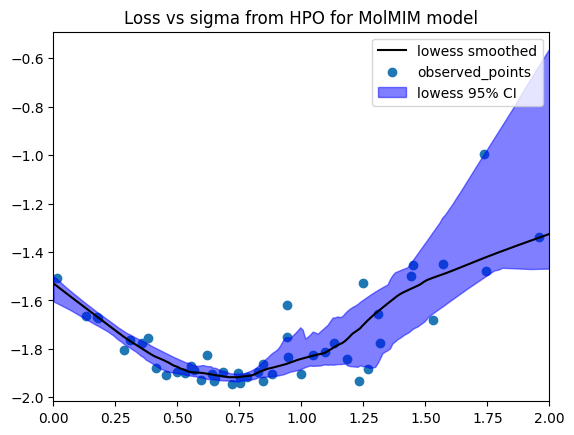

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x=data["sigma"], y=data["loss"], label="observed_points")
plt.plot(eval_x, smoothed, c="k", label="lowess smoothed")
plt.fill_between(eval_x, bottom, top, alpha=0.5, color="b", label="lowess 95% CI")
plt.legend()
plt.title("Loss vs sigma from HPO for MolMIM model")
plt.autoscale(enable=True, axis="x", tight=True);


In [19]:
smoothed_best_sigma = eval_x[np.argmin(top)]  # Use the upper bound of the confidence interval
smooth_best = {"sigma": smoothed_best_sigma}
smooth_best

{'sigma': 0.7437185929648241}

We now compare the smoothed top choice with the best nominal choice.

In [20]:
smooth_best, study.best_params

({'sigma': 0.7437185929648241}, {'sigma': 0.7181389906909391})

### Run a larger CMA-ES optimization with discovered parameters
Given the value of `sigma` we found to work well in our HPO above, we will increase the population size and steps and do a final larger optimizaiton run.

In [21]:
from tqdm import trange
optimizer = MoleculeGenerationOptimizer(
        model_wrapped,
        scoring_function,
        canonicalized_smiles,
        popsize=50,  # larger values will be slower but more thorough
        optimizer_args=smooth_best,  # Vals from HPO
    )
# Starting state for idx 0
qed_scores = [qed(canonicalized_smiles)]
tanimoto_scores = [[tanimoto_similarity([canonicalized_smiles[idx]], canonicalized_smiles[idx])[0] for idx in range(len(canonicalized_smiles))]]
best_molecules = [canonicalized_smiles]
fraction_bad_samples = [[0]*len(canonicalized_smiles)]
for i in trange(30):
    optimizer.step()
    final_smiles = optimizer.generated_smis
    # Population of molecules is returned, but we only want the best one.
    _qed_scores = []
    _tanimoto_scores = []
    _best_molecules = []
    _fraction_bad = []
    for smis_population,reference_smis in zip(final_smiles, canonicalized_smiles):
        idx = np.argmin(scoring_function(smis_population, reference_smis))
        _fraction_bad.append(np.mean(qed(smis_population) == 0))
        _best_molecules.append(smis_population[idx])
        _qed_scores.append(qed([smis_population[idx]])[0])
        _tanimoto_scores.append(tanimoto_similarity([smis_population[idx]], reference_smis)[0])
    qed_scores.append(_qed_scores)
    tanimoto_scores.append(_tanimoto_scores)
    best_molecules.append(_best_molecules)
    fraction_bad_samples.append(_fraction_bad)

(25_w,50)-aCMA-ES (mu_w=14.0,w_1=14%) in dimension 512 (seed=212874, Fri Mar 22 16:11:40 2024)
(25_w,50)-aCMA-ES (mu_w=14.0,w_1=14%) in dimension 512 (seed=270731, Fri Mar 22 16:11:40 2024)
(25_w,50)-aCMA-ES (mu_w=14.0,w_1=14%) in dimension 512 (seed=239948, Fri Mar 22 16:11:40 2024)


  0%|          | 0/30 [00:00<?, ?it/s]

[NeMo I 2024-03-22 16:11:40 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


  3%|▎         | 1/30 [00:05<02:51,  5.93s/it]

[NeMo I 2024-03-22 16:11:46 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


  7%|▋         | 2/30 [00:11<02:45,  5.92s/it]

[NeMo I 2024-03-22 16:11:52 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 10%|█         | 3/30 [00:17<02:41,  5.98s/it]

[NeMo I 2024-03-22 16:11:58 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 13%|█▎        | 4/30 [00:23<02:34,  5.95s/it]

[NeMo I 2024-03-22 16:12:04 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 17%|█▋        | 5/30 [00:29<02:29,  5.99s/it]

[NeMo I 2024-03-22 16:12:10 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 20%|██        | 6/30 [00:35<02:23,  5.96s/it]

[NeMo I 2024-03-22 16:12:16 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 23%|██▎       | 7/30 [00:41<02:19,  6.04s/it]

[NeMo I 2024-03-22 16:12:22 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 27%|██▋       | 8/30 [00:47<02:12,  6.02s/it]

[NeMo I 2024-03-22 16:12:28 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 30%|███       | 9/30 [00:54<02:06,  6.04s/it]

[NeMo I 2024-03-22 16:12:34 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 33%|███▎      | 10/30 [01:00<02:00,  6.02s/it]

[NeMo I 2024-03-22 16:12:40 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 37%|███▋      | 11/30 [01:06<01:54,  6.05s/it]

[NeMo I 2024-03-22 16:12:46 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 40%|████      | 12/30 [01:12<01:48,  6.03s/it]

[NeMo I 2024-03-22 16:12:52 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 43%|████▎     | 13/30 [01:18<01:43,  6.06s/it]

[NeMo I 2024-03-22 16:12:58 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 47%|████▋     | 14/30 [01:24<01:36,  6.04s/it]

[NeMo I 2024-03-22 16:13:04 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 50%|█████     | 15/30 [01:30<01:30,  6.07s/it]

[NeMo I 2024-03-22 16:13:10 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 53%|█████▎    | 16/30 [01:36<01:24,  6.05s/it]

[NeMo I 2024-03-22 16:13:17 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 57%|█████▋    | 17/30 [01:42<01:18,  6.08s/it]

[NeMo I 2024-03-22 16:13:23 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 60%|██████    | 18/30 [01:48<01:12,  6.06s/it]

[NeMo I 2024-03-22 16:13:29 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 63%|██████▎   | 19/30 [01:54<01:06,  6.08s/it]

[NeMo I 2024-03-22 16:13:35 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 67%|██████▋   | 20/30 [02:00<01:00,  6.06s/it]

[NeMo I 2024-03-22 16:13:41 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 70%|███████   | 21/30 [02:06<00:54,  6.07s/it]

[NeMo I 2024-03-22 16:13:47 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 73%|███████▎  | 22/30 [02:12<00:48,  6.05s/it]

[NeMo I 2024-03-22 16:13:53 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 77%|███████▋  | 23/30 [02:18<00:42,  6.08s/it]

[NeMo I 2024-03-22 16:13:59 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 80%|████████  | 24/30 [02:24<00:36,  6.05s/it]

[NeMo I 2024-03-22 16:14:05 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 83%|████████▎ | 25/30 [02:31<00:30,  6.07s/it]

[NeMo I 2024-03-22 16:14:11 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 87%|████████▋ | 26/30 [02:37<00:24,  6.05s/it]

[NeMo I 2024-03-22 16:14:17 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 90%|█████████ | 27/30 [02:43<00:18,  6.07s/it]

[NeMo I 2024-03-22 16:14:23 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 93%|█████████▎| 28/30 [02:49<00:12,  6.05s/it]

[NeMo I 2024-03-22 16:14:29 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


 97%|█████████▋| 29/30 [02:55<00:06,  6.08s/it]

[NeMo I 2024-03-22 16:14:35 megatron_lm_encoder_decoder_model:1192] Decoding using the beam search method with beam size=3...


100%|██████████| 30/30 [03:01<00:00,  6.04s/it]


### Explore results
Below, we create a plot disaplaying how the components of our target (QED and Tanimoto similarity) changed over each iteration. By our target definition, any value above 0.4 for Tanimoto similarity would be optimal so we expect noise around that value. Similarly, for QED any value above 0.9 would be optimal so we expect noise around that value if any molecule surpasses that threshold.

Text(0.5, 1.0, 'Targets over time for MolMIM model')

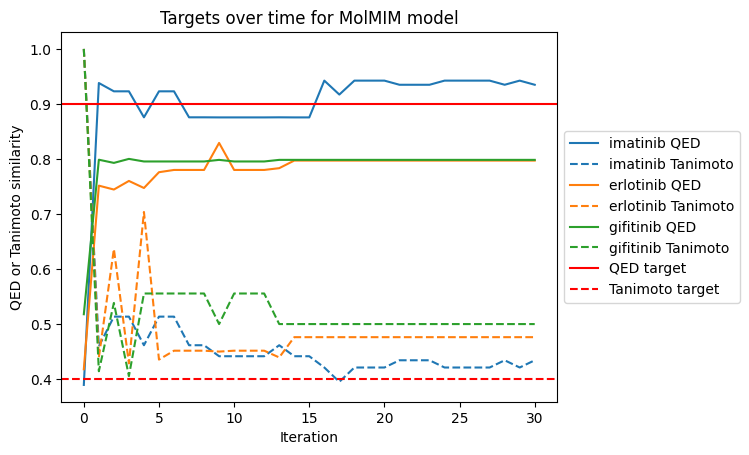

In [22]:
import matplotlib.pyplot as plt
for i, molecule in enumerate(["imatinib", "erlotinib", "gifitinib"]):
    line, = plt.plot(np.arange(len(qed_scores)), [q[i] for q in qed_scores], label=f"{molecule} QED")
    color = line.get_color()
    plt.plot(np.arange(len(tanimoto_scores)), [t[i] for t in tanimoto_scores], label=f"{molecule} Tanimoto", linestyle="--", color=color)
plt.axhline(y=0.9, color='r', linestyle='-', label="QED target")
plt.axhline(y=0.4, color='r', linestyle='--', label="Tanimoto target")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Iteration")
plt.ylabel("QED or Tanimoto similarity")
plt.title("Targets over time for MolMIM model")

### How well did our optimization perform?
To examine the performance of out optimization, we can quantify the number of invalid samples that were generated. An "invalid" SMILES is defined as a SMILES string that does not represent a chemically-valid underlying molecule.

In [23]:
np.mean(fraction_bad_samples)

0.0015053763440860217

We can finally quantify the improvement in QED over the baseline value and the fraction of our optimized molecules that maintained the desired Tanimoto similarity threshold above 0.4.

In [24]:
qed_improvements = []
tanimoto_above_04 = []
for i in range(len(starting_qed)):
    tanimoto_above_04.append(tanimoto_scores[-1][i] >= 0.4)
    qed_improvements.append(qed_scores[-1][i] - starting_qed[i])
{"mean_qed_improvement": np.mean(qed_improvements), "tanimoto_above_04": np.mean(tanimoto_above_04)}

{'mean_qed_improvement': 0.40173431938851917, 'tanimoto_above_04': 1.0}